In [1]:
import numpy as np
from numpy import fft as fft

from matplotlib import pyplot as plt

In [2]:
stress = np.genfromtxt("log.shear.T1.5.rho0.85.txt", delimiter = ' ', skip_header = True)
stress

array([[ 0.00000000e+00,  4.96238708e-02, -2.17844377e-02,
         2.82129495e-02],
       [ 2.00000000e-03,  5.11366138e-02, -2.75222937e-02,
         2.20791230e-02],
       [ 4.00000000e-03,  5.20204227e-02, -3.44815288e-02,
         1.50219582e-02],
       ...,
       [ 9.99996000e+02,  1.54310196e-01, -8.45230428e-02,
        -1.34106935e-02],
       [ 9.99998000e+02,  1.56775550e-01, -8.91642558e-02,
        -1.99354714e-02],
       [ 1.00000000e+03,  1.59719572e-01, -9.39813421e-02,
        -2.68187084e-02]])

In [3]:
time, pxy, pxz, pyz = stress[:,0], stress[:,1], stress[:,2], stress[:,3]

In [4]:
def acf(data, npts = None):
    """
    Computes time autocorrelation function of a real-valued array `data`.
    """
    
    n = len(data)
    if npts is None:
        npts = n
    npts = min(npts, n)
    dataf = fft.rfft(np.append(data, np.zeros(n)))
    acf = fft.irfft(np.conj(dataf) * dataf)[0:npts]
    for i in range(npts):
        acf[i] /= n - i
    
    return acf[0:npts]

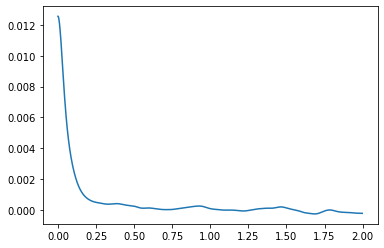

In [5]:
plt.plot(time[0:1000], acf(pxy, 1000))

In [6]:
def integrate(ydata, xdata = None):
    """
    Computes running integral of `ydata` using `xdata` as abscissae.
    """
    
    n = len(ydata)
    if xdata is None:
        xdata = range(n)
    
    integ = np.zeros(n)
    for i in range(1,n):
        integ[i] = integ[i-1] + (ydata[i-1] + ydata[i]) / 2 * (xdata[i] - xdata[i-1])
    
    return integ

In [7]:
intxy, intxz, intyz = integrate(acf(pxy, 1000), time), integrate(acf(pxz, 1000), time), integrate(acf(pyz, 1000), time)

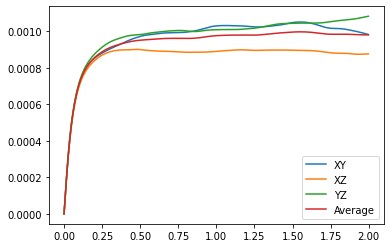

In [8]:
fig = plt.figure()
plotint = fig.add_subplot(111)
plotint.plot(time[0:1000], intxy, label="XY")
plotint.plot(time[0:1000], intxz, label="XZ")
plotint.plot(time[0:1000], intyz, label="YZ")
plotint.plot(time[0:1000], (intxy + intxz + intyz) / 3, label="Average")

plt.legend()

plt.show()